In [ ]:
!wget --no-check-certificate \
  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
  -O /content/drive/MyDrive/tmp/cats_and_dogs_filtered.zip

--2023-05-31 02:52:54--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.120.128, 142.250.159.128, 142.251.120.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.120.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/content/drive/MyDrive/tmp/cats_and_dogs_filtered.zip’

/content/drive/MyDr 100%[===================>]  65.43M  58.0MB/s    in 1.1s    

2023-05-31 02:52:55 (58.0 MB/s) - ‘/content/drive/MyDrive/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [ ]:
import os
import zipfile

local_zip = '/content/drive/MyDrive/tmp/cats_and_dogs_filtered.zip'

zip_ref = zipfile.ZipFile(local_zip, 'r')

zip_ref.extractall('/content/drive/MyDrive/tmp')
zip_ref.close()

In [2]:
import os


base_dir = '/content/drive/MyDrive/tmp/cats_and_dogs_filtered'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Directory with our training cat/dog pictures
train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directory with our validation cat/dog pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

In [3]:
train_cat_fnames = os.listdir( train_cats_dir )
train_dog_fnames = os.listdir( train_dogs_dir )

print(train_cat_fnames[:10])
print(train_dog_fnames[:10])

['cat.127.jpg', 'cat.126.jpg', 'cat.125.jpg', 'cat.124.jpg', 'cat.123.jpg', 'cat.122.jpg', 'cat.121.jpg', 'cat.120.jpg', 'cat.119.jpg', 'cat.118.jpg']
['dog.127.jpg', 'dog.126.jpg', 'dog.125.jpg', 'dog.124.jpg', 'dog.123.jpg', 'dog.122.jpg', 'dog.121.jpg', 'dog.120.jpg', 'dog.119.jpg', 'dog.118.jpg']


In [4]:
print('total training cat images :', len(os.listdir(      train_cats_dir ) ))
print('total training dog images :', len(os.listdir(      train_dogs_dir ) ))

print('total validation cat images :', len(os.listdir( validation_cats_dir ) ))
print('total validation dog images :', len(os.listdir( validation_dogs_dir ) ))

total training cat images : 985
total training dog images : 1000
total validation cat images : 500
total validation dog images : 493


In [5]:
%matplotlib inline

import matplotlib.image as mpimg
import matplotlib.pyplot as plt


nrows = 4
ncols = 4

pic_index = 0 

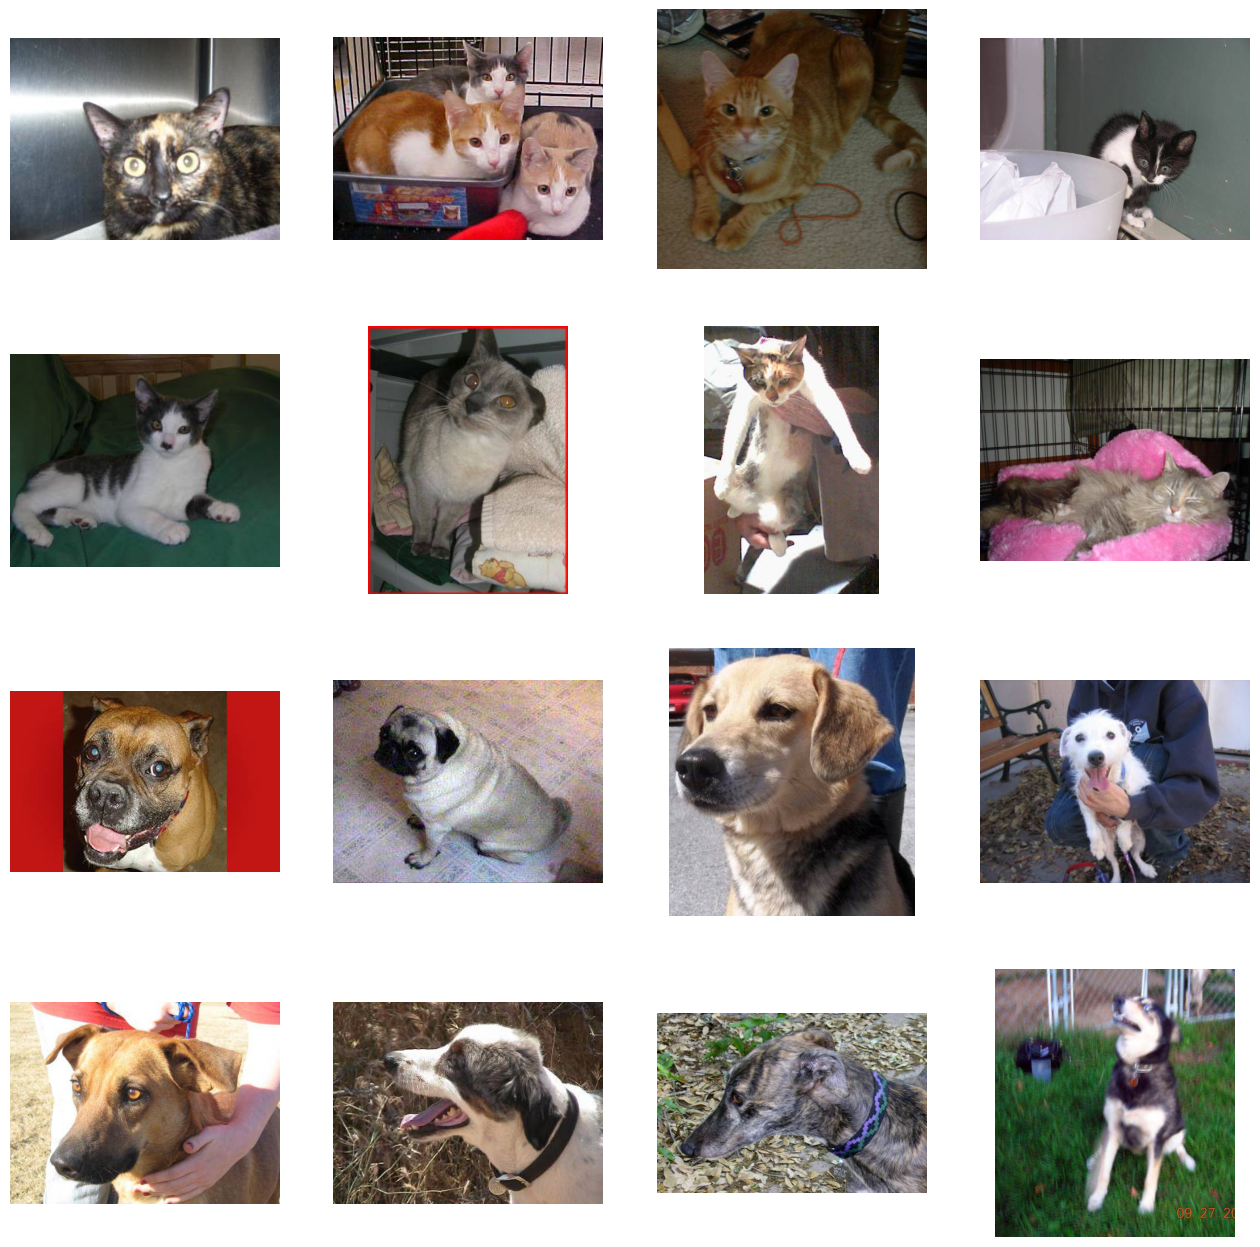

In [6]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)

pic_index+=8

next_cat_pix = [os.path.join(train_cats_dir, fname) 
                for fname in train_cat_fnames[ pic_index-8:pic_index] 
               ]

next_dog_pix = [os.path.join(train_dogs_dir, fname) 
                for fname in train_dog_fnames[ pic_index-8:pic_index]
               ]

for i, img_path in enumerate(next_cat_pix+next_dog_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

In [7]:
import tensorflow as tf

In [9]:
model = tf.keras.models.Sequential([
 
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2), 
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'), 
    tf.keras.layers.MaxPooling2D(2,2),
   
    tf.keras.layers.Flatten(), 

    tf.keras.layers.Dense(512, activation='relu'), 
  
    tf.keras.layers.Dense(1, activation='sigmoid')  
])

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 64)       0

In [11]:
from tensorflow.keras.optimizers import RMSprop

model.compile(optimizer=RMSprop(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics = ['accuracy'])

In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


train_datagen = ImageDataGenerator( rescale = 1.0/255. )
test_datagen  = ImageDataGenerator( rescale = 1.0/255. )


train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size=20,
                                                    class_mode='binary',
                                                    target_size=(150, 150))     

validation_generator =  test_datagen.flow_from_directory(validation_dir,
                                                         batch_size=20,
                                                         class_mode  = 'binary',
                                                         target_size = (150, 150))

Found 1985 images belonging to 2 classes.
Found 993 images belonging to 2 classes.


In [13]:
history = model.fit(train_generator,
                              validation_data=validation_generator,
                              steps_per_epoch=100,
                              epochs=15,
                              validation_steps=50,
                              verbose=2)

Epoch 1/15
100/100 - 421s - loss: 0.7875 - accuracy: 0.5108 - val_loss: 0.6761 - val_accuracy: 0.5227 - 421s/epoch - 4s/step
Epoch 2/15
100/100 - 13s - loss: 0.6537 - accuracy: 0.6207 - val_loss: 0.6008 - val_accuracy: 0.6838 - 13s/epoch - 135ms/step
Epoch 3/15
100/100 - 13s - loss: 0.5973 - accuracy: 0.6831 - val_loss: 0.5784 - val_accuracy: 0.6908 - 13s/epoch - 128ms/step
Epoch 4/15
100/100 - 13s - loss: 0.5226 - accuracy: 0.7360 - val_loss: 0.5996 - val_accuracy: 0.6888 - 13s/epoch - 130ms/step
Epoch 5/15
100/100 - 13s - loss: 0.4480 - accuracy: 0.7940 - val_loss: 0.5415 - val_accuracy: 0.7301 - 13s/epoch - 129ms/step
Epoch 6/15
100/100 - 13s - loss: 0.3846 - accuracy: 0.8262 - val_loss: 0.5772 - val_accuracy: 0.7029 - 13s/epoch - 130ms/step
Epoch 7/15
100/100 - 14s - loss: 0.3247 - accuracy: 0.8549 - val_loss: 0.6303 - val_accuracy: 0.7321 - 14s/epoch - 138ms/step
Epoch 8/15
100/100 - 13s - loss: 0.2179 - accuracy: 0.9194 - val_loss: 0.7372 - val_accuracy: 0.7281 - 13s/epoch - 131m

In [15]:
import numpy as np

from google.colab import files
from keras.preprocessing import image

uploaded=files.upload()

for fn in uploaded.keys():
 
 
  path='/content/' + fn


  img = tf.keras.utils.load_img(path, target_size=(150, 150))
  x = tf.keras.utils.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
 
  
  classes = model.predict(images, batch_size=10)
  
  print(classes[0])
  
  if classes[0]>0:
    print(fn + " is a dog")
    
  else:
    print(fn + " is a cat")

Saving dog1.jpeg to dog1.jpeg
1/1 [==============================] - 0s 21ms/step
[1.]
dog1.jpeg is a dog


Text(0.5, 1.0, 'Training and validation loss')

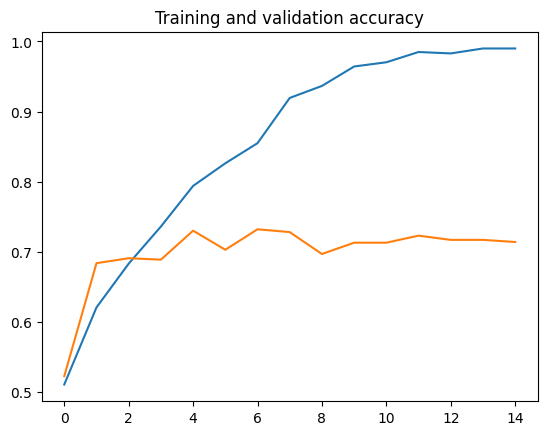

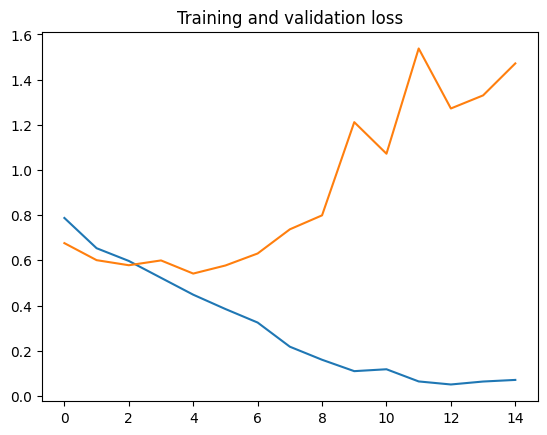

In [16]:

acc      = history.history[     'accuracy' ]
val_acc  = history.history[ 'val_accuracy' ]
loss     = history.history[    'loss' ]
val_loss = history.history['val_loss' ]

epochs   = range(len(acc)) # Get number of epochs


plt.plot  ( epochs,     acc )
plt.plot  ( epochs, val_acc )
plt.title ('Training and validation accuracy')
plt.figure()


plt.plot  ( epochs,     loss )
plt.plot  ( epochs, val_loss )
plt.title ('Training and validation loss'   )

In [ ]:
import os, signal

os.kill(     os.getpid() , 
         signal.SIGKILL
       )